In [63]:
#!/usr/bin/env python3
import csv                           #importing csv module
import numpy as np                   #Importing numpy module as np 
import pandas as pd                  #Importing pandas module as pd
import matplotlib.pyplot as plt      #Importing mathplotlib as plt
from collections import Counter      #Importing counter
import operator

In [64]:
#This is the first question
record_no=0
with open('bollywood.csv') as csv_file:                        
    csv_reader = csv.reader(csv_file, delimiter=',')                    #Reading csv file
    for row in csv_reader:
        record_no+=1
print("The no of records in this csv file is:",record_no-1)

The no of records in this csv file is: 149


In [65]:
#Second Question
path = 'bollywood.csv'                                                      #Path of csv file
df = pd.read_csv(path)                                                      #Reading csv file using pandas
no_of_movies=[]
Release_times = df['ReleaseTime'].unique()                                  #Getting the different release times
print("The different release times are:",Release_times)
for i in Release_times:                                                     #Looping to get the no of movies in each time
    movieno=0
    for j in range(0,len(df["ReleaseTime"])):
        if df["ReleaseTime"][j]==i:
            movieno+=1
        else:
            continue
    no_of_movies.append(movieno)
print("The no of movies in each release times are:",no_of_movies)           #No of movies on each time
print("Now sorting by movie release time")                                  
print(df.sort_values(by=['ReleaseTime'],ascending=False,inplace=False))     #Sorting in descending order

The different release times are: ['LW' 'N' 'HS' 'FS']
The no of movies in each release times are: [15, 99, 18, 17]
Now sorting by movie release time
     SlNo Release Date                         MovieName ReleaseTime  \
74     75    25-Apr-14                     Revolver Rani           N   
65     66    28-Mar-14                            O Teri           N   
75     76    28-Feb-14            Shaadi Ke Side Effects           N   
1       2     4-Jan-13                      Table No. 21           N   
73     74    29-Aug-14                    Raja Natwarlal           N   
..    ...          ...                               ...         ...   
121   122     8-Nov-13                           Satya 2          FS   
122   123    15-Nov-13                             Rajjo          FS   
40     41     8-Mar-13  Saheb, Biwi Aur Gangster Returns          FS   
125   126    11-Oct-13                 War Chhod Na Yaar          FS   
126   127    11-Oct-13                     Baat Ban Gayi   

In [66]:
#Third Question
festive_season_mov=[]                                                       #Creating a list
for j in range(0,len(df["ReleaseTime"])):                                   
    if df["ReleaseTime"][j]=='FS':                                          #Getting values which have Release Time=FS
        festive_season_mov.append(df["Genre"][j])                           
    else:
        continue
c = dict(Counter(festive_season_mov))                                        #Counting the resultant list and changing it to a dictionary
print(c)
print("Most released Genre during festive season is Drama and Thriller")     #Printing output

{' Drama ': 4, 'Thriller': 4, 'Action': 3, 'Romance': 3, 'Comedy': 3}
Most released Genre during festive season is Drama and Thriller


In [67]:
#Fourth Question
pd.crosstab(df.ReleaseTime,df.Genre)      #Cross Tabulation to get how many genres were released with their release times

Genre,Drama,Action,Action,Comedy,Romance,Thriller,Thriller
ReleaseTime,,,,,,,
FS,4,3,0,3,3,4,0
HS,6,3,0,5,3,1,0
LW,1,3,0,5,4,1,1
N,24,12,3,23,15,20,2


In [68]:
#Fifth Question
df['year'] = pd.DatetimeIndex(df['Release Date']).year        #Creating new column year
print(df["year"])
one_four=0
one_three=0
one_five=0
Release_year = df['year'].unique()                            #getting unique years
for i in Release_year:
    if i==2014:
        one_four+=1
    elif i==2013:
        one_three+=1
    else:
        one_five+=1
if one_four>one_three and one_four>one_five:                  #printing output
    print("2014 has the most releases")
elif one_five>one_four and one_five>one_three:
    print("2015 has the most releases")
else:
    print("2013 has the most releases")

0      2014
1      2013
2      2014
3      2013
4      2014
       ... 
144    2015
145    2015
146    2015
147    2015
148    2014
Name: year, Length: 149, dtype: int64
2013 has the most releases


In [69]:
#sixth question
df['month'] = pd.DatetimeIndex(df['Release Date']).month                            #Creating new column month
rich_month=[]                                                                       #Declaring a list
for j in range(0,len(df["month"])):                                   
    if df["Budget"][j]>=30:                                          
        rich_month.append(df["month"][j])                           
    else:
        continue
coun = dict(Counter(rich_month))                                                    #Converting the list to a dictionary
most_occ_month=max(coun.items(), key=operator.itemgetter(1))[0]                     #Getting the month with max no of high budget movies
print("The month which has the max no of high budget movies is:",most_occ_month)    #Printing month with the highest budget movies

The month which has the max no of high budget movies is: 2


In [70]:
#Question seven
df["ROI"]=(df['BoxOfficeCollection'] - df['Budget']) / df['Budget']                     #Creating a new column and calculating ROI
sortv= df.sort_values(["ROI"])                                                          #Sorting by ROI
print("Top 10 movies with minimum Return of Investment(ROI)",sortv.head(10))            #Getting output

Top 10 movies with minimum Return of Investment(ROI)      SlNo Release Date             MovieName ReleaseTime     Genre  Budget  \
9      10    11-Jan-13             Gangoobai           N    Drama        2   
15     16    18-Jan-13               Bandook           N    Action       4   
53     54    22-Mar-13              Sona Spa           N  Thriller      10   
3       4     4-Jan-13      Rajdhani Express           N    Drama        7   
49     50     2-May-14  Kya Dilli Kya Lahore          HS    Drama        7   
121   122     8-Nov-13               Satya 2          FS  Thriller      15   
67     68     2-May-14          Purani Jeans          HS   Romance      10   
103   104    25-Apr-14        Samrat and Co.           N  Thriller      18   
30     31     7-Feb-14             Heartless           N  Thriller      12   
102   103    25-Apr-14               Kaanchi           N    Drama       31   

     BoxOfficeCollection  YoutubeViews  YoutubeLikes  YoutubeDislikes  year  \
9        

In [71]:
#Question eight
total_roi_in_one_time=0                                                             #Declaring a variable for total roi for each time
no_of_roi_movies=0                                                                  #Declaring a varible for no of movies in each time
avg_roi_each_time=0                                                                 #Declaring a variable for average roi of each time
profits_in_release_times=[]                                                         #Looping to get variable for each time
for i in Release_times:
    for j in range(0,len(df["ROI"])):
        if df["ReleaseTime"][j]==i:
            no_of_roi_movies+=1
            total_roi_in_one_time+=df["ROI"][j]
    avg_roi_each_time=total_roi_in_one_time/no_of_roi_movies                         #Calculating average ROI of each time
    profits_in_release_times.append(avg_roi_each_time)                               #Appending it to a list
print("The release times are:",Release_times)
print("The respective average ROIs for each time are:",profits_in_release_times)     #Output
print("Long Weekends(LW) are the most profitable")

The release times are: ['LW' 'N' 'HS' 'FS']
The respective average ROIs for each time are: [1.1272053098737973, 0.7194957988691285, 0.7374100241261616, 0.7643867624682313]
Long Weekends(LW) are the most profitable


In [72]:
#Question nine
box_office_column=df["BoxOfficeCollection"]                                        #Declaring a variable for box office
youtube_views_column=df["YoutubeViews"]                                            #Declaring a variable for youtube views
correlation=box_office_column.corr(youtube_views_column)                           #Checking if there is a correlation
if correlation>0:                                                                  #Output
    print('Yes it is correlated')
else:
    print('No it isnt correlated')

Yes it is correlated


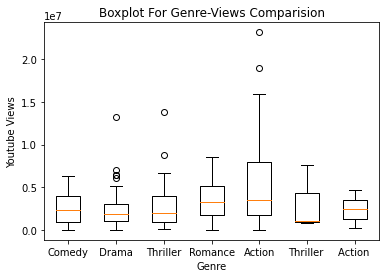

In [73]:
#Question ten
boxplot_youtube_genre= list(set(df['Genre']))                                     #Creating a boxplot for genre vs youtube views
boxplot_list = ['sa','c','d','r','a','st','t']
for i in range(len(boxplot_youtube_genre)):                                       
    boxplot_list[i] = [ ]
    boxplot_list[i] += list(df[df['Genre'] == boxplot_youtube_genre[i]]['YoutubeViews'])
plt.boxplot([boxplot_list[i] for i in range(len(boxplot_youtube_genre))],labels=boxplot_youtube_genre)
plt.title("Boxplot For Genre-Views Comparision")
plt.xlabel("Genre")
plt.ylabel("Youtube Views")
plt.show()

In [ ]:
#Question Eleven
heatmap_df_1=df.drop(df.columns[[0,1,2,3,4,10,11,12,13,14]],axis=1)
heatmap_df_2= heatmap_df_1.columns[[0,1,2,3,4]]
plt.imshow(heatmap_df_1, cmap = 'autumn', interpolation = 'nearest',)
plt.title("Heat Map")
plt.yticks(range(len(heatmap_df_2)),heatmap_df_2)
plt.xticks(range(len(heatmap_df_2)),heatmap_df_2,rotation=90)
plt.show()
print(f'YoutubeViews,YoutubeLikes are highly correlated{end}')

In [ ]:
#Question twelve
df_graph= df.groupby('Genre').sum('Box Office Collection')
df_graph_2 = df_graph['BoxOfficeCollection']
df_graph_3= list(df_graph.index[:])
print(f'The genre of movies and their box office collection\n{df_graph_2}{end}')
plt.bar(df_graph_3, list(df_graph_2))
plt.title("Genre vs Box Office Collection")
plt.xlabel("Genre")
plt.ylabel("Box Office Collection")
plt.show()

In [ ]:
#Question 13
graph_df_1 = df.groupby('Year').sum('Movies Released')['Movies Released']
graph_df_2= list(df.groupby('Year').sum('Movies Released').index[:])
print(f'Number of movies released in every year\n{graph_df_1}{end}')
plt.bar(graph_df_2, graph_df_1)
plt.yticks(range(70)[::5])
plt.title("Year vs Movies Released")
plt.xlabel("Year")
plt.ylabel("Movies Released")
plt.show()

In [ ]:
#Question 14
distribution_1= df.groupby('Genre').sum('Budget')['Budget']
distribution_2= list(distribution_1.index[:])
plt.pie(distribution_1, explode=(0, 0, 0.1, 0, 0, 0, 0.1),
       labels=distribution_2, autopct='%.2f %%')
plt.title("Distribution of movie budget for every Genre")
plt.show()
print(f'Distribution of movie budget for every Genre\n{distribution_1}{end}')

In [ ]:
#Question 15
last_qs_1= df.groupby('Year').sum('Youtube Likes')
last_qs_2 = list(last_qs_1.index[:])
print(f'The number of YouTube likes and YouTube dislikes every year\n{last_qs_1.iloc[:,[4,5]]}{end}')
plt.plot(last_qs_2, last_qs_1.iloc[:, 4], 'b*-')
plt.plot(last_qs_2, last_qs_1.iloc[:, 5], 'r*-')
plt.legend(['Youtube Likes', 'Youtube dislikes'])
plt.title("Youtube Likes vs Youtube dislikes every year")
plt.xlabel("Year")
plt.ylabel("count")
plt.show()
print()